In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data=pd.read_csv('taxi_trip_pricing.csv')
data.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
data.isnull().sum().sum()

np.int64(549)

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [8]:
#Label encoding
data['Time_of_Day'].unique()


array(['Morning', 'Evening', 'Afternoon', 'Night'], dtype=object)

In [9]:
Time={'Morning':1,'Afternoon':2,'Evening':3,'Night':4}
data['Time_of_Day']=data['Time_of_Day'].map(Time)

In [10]:
data['Day_of_Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [11]:
Day={'Weekday':1,'Weekend':2}
data['Day_of_Week']=data['Day_of_Week'].map(Day)

In [12]:
data['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [13]:
Traffic={'Low':1,'High':2,'Medium':3}
data['Traffic_Conditions']=data['Traffic_Conditions'].map(Traffic)

In [14]:
data['Weather'].unique()

array(['Clear', 'Rain', 'Snow'], dtype=object)

In [15]:
Weather_={'Clear':1, 'Rain':2, 'Snow':3}
data['Weather']=data['Weather'].map(Weather_)

In [16]:
data.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82,36.2624
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27,52.9032
5,8.64,2,2,2.0,3,1,2.55,1.71,0.48,89.33,60.2028
12,41.79,4,2,3.0,2,1,4.60,1.77,0.11,86.95,88.1328
14,9.91,3,1,2.0,2,1,2.32,1.26,0.34,41.72,28.9914


In [17]:
y=data['Trip_Price']

In [18]:
x=data.drop('Trip_Price',axis=1)

In [19]:
x.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27
5,8.64,2,2,2.0,3,1,2.55,1.71,0.48,89.33
12,41.79,4,2,3.0,2,1,4.60,1.77,0.11,86.95
14,9.91,3,1,2.0,2,1,2.32,1.26,0.34,41.72


In [20]:
data.dtypes

Trip_Distance_km         float64
Time_of_Day                int64
Day_of_Week                int64
Passenger_Count          float64
Traffic_Conditions         int64
Weather                    int64
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object

In [21]:
#train-test split
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape

(449, 10)

In [24]:
#training the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [25]:
model_dict={
    'lr_model':LinearRegression(),
'svr_model':SVR(),
'knn_model':KNeighborsRegressor(),
'xg_model':XGBRegressor()
}

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
acs=[]

In [28]:
for name,model in model_dict.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=mean_absolute_error(y_test,y_pred)
    acs.append(ac)


In [29]:
print(acs)

[9.512074595808969, 20.373197064043804, 13.180091224623235, 5.222452407267003]


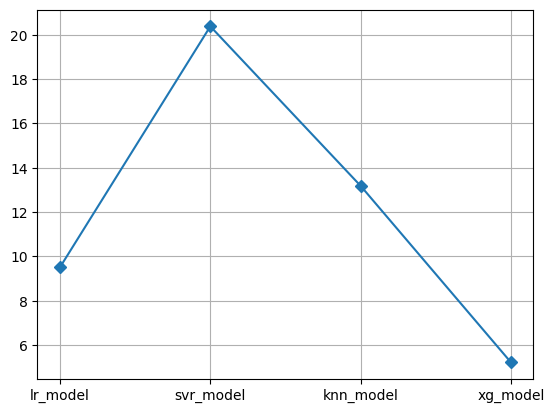

In [30]:
#plot the accuracy
plt.plot(model_dict.keys(),acs,marker='D')
plt.grid()

In [31]:
# since  the mse of xgboost is lower with go with xgboost

In [32]:
xg_model=XGBRegressor()

In [33]:
xg_model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
y_pred1=xg_model.predict(x)
y_pred1[1:10]

array([ 52.894627,  53.299194,  88.153175,  29.0435  ,  27.470345,
        48.30027 ,  68.9891  ,  44.91021 , 323.40634 ], dtype=float32)

In [40]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,xg_pred
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82,36.2624,36.315125
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27,52.9032,52.894627
5,8.64,2,2,2.0,3,1,2.55,1.71,0.48,89.33,60.2028,53.299194
12,41.79,4,2,3.0,2,1,4.60,1.77,0.11,86.95,88.1328,88.153175
14,9.91,3,1,2.0,2,1,2.32,1.26,0.34,41.72,28.9914,29.043501


In [39]:
data['xg_pred']=y_pred1

(array([184., 255.,  94.,  14.,   1.,   0.,   2.,   1.,   4.,   7.]),
 array([  6.12751627,  38.71645355,  71.3053894 , 103.89432526,
        136.48326111, 169.07218933, 201.66113281, 234.25007629,
        266.83898926, 299.42791748, 332.01687622]),
 <BarContainer object of 10 artists>)

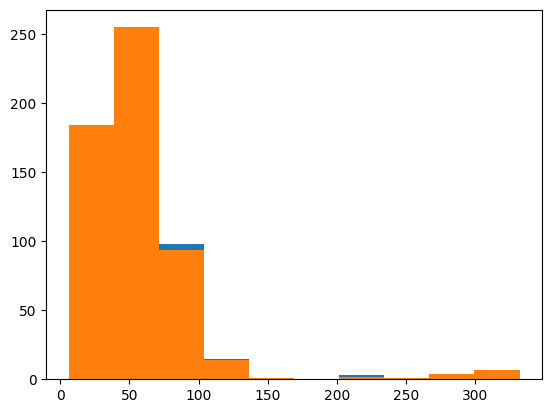

In [41]:
plt.hist(data['Trip_Price'])
plt.hist(data['xg_pred'])

In [47]:
data.head(2)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,1,3.0,1,1,3.56,0.80,0.32,53.82,36.2624
2,36.87,3,2,1.0,2,1,2.70,1.21,0.15,37.27,52.9032


In [58]:
new_trip = {
    'Trip_Distance_km': 19.35,
    'Time_of_Day': 1,
    'Day_of_Week': 1,
    'Passenger_Count': 2,
    'Traffic_Conditions': 1,
    'Weather': 1,
    'Base_Fare': 3.56,
    'Per_Km_Rate': 0.80,
    'Per_Minute_Rate': 0.32,
    'Trip_Duration_Minutes': 53.82
}

In [59]:
input_data=pd.DataFrame([new_trip])

In [61]:
price=xg_model.predict(input_data)
print("predicted price:",price[0])

predicted price: 36.442097
